Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *
import pyvista as pv

import OpenVisus as ov

ov.DbModule.attach()

Part 1

In [ ]:
#function to plot the image data with matplotlib
#optional parameters: colormap, existing plot to reuse (for more interactivity)
def showData2D(data, cmap=None, plot=None):
    if len(data.shape)==3 and data.shape[0]==1: data=data[0,:,:]
    if len(data.shape)==3 and data.shape[1]==1: data=data[:,0,:]   
    if len(data.shape)==3 and data.shape[2]==1: data=data[:,:,0]
    if(plot==None or cmap!=None):
        fig=plt.figure(figsize = (7,5))
        plot = plt.imshow(data, origin='lower', cmap=cmap)
        plt.show()
        return plot
    else:
        plot.set_data(data)
        plt.show()
        return plot

def showData(data, cmap=None, pl=None, opacity='linear'):
    
    data = pv.wrap(data)
    if pl == None:
        pl = pv.Plotter()
    #     pl.clear_actors()
        actor = pl.add_mesh(data, cmap=cmap, opacity=opacity)
        pl.show()
        return pl
    else:
        pl.clear_actors()
        actor = pl.add_mesh(data, cmap=cmap, opacity=opacity)
        pl.show()
        return pl
#     if len(data.shape)==3 and data.shape[0]==1: data=data[0,:,:]
#     if len(data.shape)==3 and data.shape[1]==1: data=data[:,0,:]   
#     if len(data.shape)==3 and data.shape[2]==1: data=data[:,:,0]
#     if(plot==None or cmap!=None):
#         fig=plt.figure(figsize = (7,5))
#         plot = plt.imshow(data, origin='lower', cmap=cmap)
#         plt.show()
#         return plot
#     else:
#         plot.set_data(data)
#         plt.show()
#         return plot

1.) (CODING) In your Jupyter notebook provide a cell that loads the dataset at resolution 17, timestep 0 and creates a static visualization using matplotlib. [5 pts]

In [ ]:
dataset=ov.LoadDataset("https://atlantis.sci.utah.edu/mod_visus?dataset=BlueMarble")
data = dataset.read(time=0, max_resolution=17)
showData2D(data)

2.) (CODING) Provide a new cell that loads the dataset at multiple resolutions, timestep 0 and creates an interactive visualization using matplotlib. Your interface should include a slider to change resolution with min resolution = 5, max resolution = 21, and step size = 4. [5 pts]

In [ ]:
# Plot the 2D image using matplotlib with different time and resolutions

interact(
    lambda resolution: showData2D(dataset.read(time=0,max_resolution=resolution)), 
    resolution=widgets.IntSlider(value=9,min=5,max=21,step=4))

3.) (CODING) Provide a new cell that loads the dataset at multiple resolutions, timesteps and creates an interactive visualization using matplotlib. Your interface should include a slider to change resolution and a slider to change time. [5 pts]

In [ ]:
# Plot the 2D image using matplotlib with different time and resolutions

interact(
    lambda time,resolution: showData2D(dataset.read(time=time,max_resolution=resolution)),
    time=widgets.IntSlider(value=0,min=0,max=11,step=1), 
    resolution=widgets.IntSlider(value=9,min=5,max=21,step=4))

4.) NOT DONE 

(CODING) In a new cell, extend the interface you created in 3. by adding a threshold slider and modify the visualization to display the image after thresholding (Note: you need to perform thresholding on a grayscale image). Choose appropriate values for min, max and step size for the threshold slider. [5 pts]

In [ ]:
def doThreshold(data, t):
  data = makeGrey(data)
  # print(type(data))
  return data > t

def makeGrey(data):
  shape = data.shape
  R,G,B=(0.2989*data[:,:,0], 0.5870*data[:,:,1], 0.1140*data[:,:,2])
  grey_data=R+G+B
  grey_data = np.reshape(grey_data, (shape[0], shape[1], 1))
  return grey_data

data = dataset.read(time=0, max_resolution=21)
# print(np.mean(data))
# print(np.min(data))
# print(np.max(data))

dataTest = doThreshold(data, 12)
# print(dataTest)
# print(np.mean(dataTest))
# print(np.min(dataTest))
# print(np.max(dataTest))


pl = pv.Plotter()
interact(
    lambda time,resolution, threshold: showData(doThreshold(data, threshold), cmap=plt.get_cmap("Greys"), pl=pl),
    time=widgets.IntSlider(value=0,min=0,max=11,step=1), 
    resolution=widgets.IntSlider(value=9,min=5,max=21,step=4),
    threshold=widgets.IntSlider(value=200, min=0, max=500, step=1))

5.) NOT DONE

(CODING) Set the threshold value to 210 and identify the pixels above this threshold value as snow. [5 pts]

1. Provide a cell that plots the density of snow as a function of time, at resolutions [5, 9, 13, 17, 21]. Comment your observations briefly.

2. Provide a cell that computes and plots the error in the density of snow for successive resolutions (i.e. error between resolution 5 and 9, 9 and 13 and so on). Comment your observations briefly. Report the resolutions at which the standard deviation of the error is less than 0.002.

6.) NOT DONE

(CODING) For each resolution you reported in 5.2, compute the range of  threshold values for which the density of snow in the Northern Hemisphere is approximately 5-15% during the winter season (December through March). For each resolution, report the mean threshold value. [5 pts]

7.) NOT DONE

(CODING) Provide a cell that interactively plots the density of snow as a function of time. Your interface should include a slider to change the resolution. Note: You should use only the resolutions you found in 5.b and the corresponding mean threshold values you reported in 6. to compute the density of snow. For each resolution, report the month that received the highest amount of snow and the month that received the lowest amount of snow. [5 pts]

8.) NOT DONE

(CODING) Divide the domain of the dataset into quadrants. Denote the quadrant in top left as Q1 and the quadrant in top right as Q2 (see image below). For resolution 21, with help of an appropriate visualization, find the months in which the density of snow in Q2 is greater than that in Q1. Use the mean threshold value you reported in 6. for resolution 21. [5 pts]

Questions:

Question 1: What is the embedding dimension of this dataset? [3 pts]

Question 2: What is the embedding dimension of the visualization you made in coding exercise 3 and 4? [3 pts]

Question 3:  What is the size of the numpy array in bytes for loading the dataset at resolutions [5, 9, 13, 17, 21], including in memory only timestep 9? [3 pts]

Question 4: At what resolution can you roughly identify continent boundaries? What happens to the boundaries above and below this resolution? What do you infer from this? [3 pts]

Question 5: What is the size of the numpy array in bytes for loading the dataset at resolutions [5, 9, 13, 17, 21], including in memory all the timesteps? [3 pts]

Question 6: Briefly summarize your findings. What did you learn about the science? What did you learn in terms of using the tools while developing the solution of this homework? [5 pts]

Part 2

In [ ]:
def showData3D(data, pl=None, opacity='linear'):
    grid = pv.UniformGrid()
    grid.dimensions = np.array((data.shape[2], data.shape[1], data.shape[0]))
    grid.point_data["values"] = data.flatten()
    
    if pl == None:
        pl = pv.Plotter()
    else:
        pl.clear_actors()
    
    actor = pl.add_volume(grid, opacity=opacity)
    
    pl.show(cpos="xz")
    pl.reset_camera()
    return pl

1.) (CODING) In your Jupyter notebook provide a cell that loads the dataset at resolution 24, timestep 15. Save the data to a binary file (using “.raw” extension). [5 pts]

In [ ]:
dataset = ov.LoadDataset("https://atlantis.sci.utah.edu/mod_visus?dataset=borg")
data = dataset.read(time=15, max_resolution=24)
# # Create a new output file
# idxfile = ov.IdxFile("borg.raw")

# # Set the dimensions, data type, and layout of your data
# idxfile.SetPointDim(dataset.getTotalNumberOfSamples())
# idxfile.SetDataType(dataset.getBitPrecision())
# idxfile.SetLayout("row_major")

# # Write your data to the output file
# data = dataset.getField("myfield").c_ptr()
# idxfile.write(data, dataset.getTotalNumberOfSamples() * dataset.getBitPrecision() // 8)

2.) (CODING) In your Jupyter notebook provide a cell that loads the dataset at multiple resolutions [15, 18, 21, 24], timesteps and creates an interactive visualization using pyvista. Your interface should include two sliders, (i) a slider to change resolution and (ii) a slider to change time. [5 pts]

In [ ]:
pl = pv.Plotter()
interact(
    lambda time,resolution: showData3D(dataset.read(time=time,max_resolution=resolution), pl=pl),
    time=widgets.IntSlider(value=15,min=0,max=15,step=1), 
    resolution=widgets.IntSlider(value=24,min=5,max=24,step=1))

3.) (CODING) Devise an algorithm to estimate percentage thickness of the mixing layer as a function of time for resolutions [15, 18, 21, 24] using z-slices (i.e. plane orthogonal to the z-axis). Provide visualization evidence to support your result and briefly explain your findings. [10 pts]

In [63]:
def getThick(maxTime, size, dataset, resolutions=[15, 18, 21, 24], steps=[64, 32, 16, 16]):
    results = []
    for i in range(0, len(resolutions)):
      resolution = resolutions[i]
      step = steps[i]
      list = []
      for time in range(0, maxTime + 1): 
        thick = 0
        for slice in range(size, 1, -step):
          data=dataset.read(x=[0,size], y=[0,size], z=[slice-step, slice], max_resolution=resolution, time=time)
          if np.max(data) != np.min(data):
            thick += 1
        layers = thick * step
        percent = layers / size * 100
        list.append(percent)
      results.append(list)
    
    return results



In [ ]:
maxTime = 15
size = 1152
res = getThick(maxTime, size, dataset)

plt.figure()
for i in range(len(res)):
    plt.plot(res[i])
plt.legend(['15', '18', '21', '24'])
plt.show()

4.) (CODING) Devise an algorithm to estimate percentage thickness of the mixing layer as a function of time for resolutions [15, 18, 21, 24] using a (i) x-orthogonal plane in the middle of the volume, as a surrogate to the entire volume and a (ii) y-orthogonal plane in the middle of the volume, as a surrogate to the entire volume. Provide visualization evidence to support your result and briefly explain your findings. [10 pts]

In [62]:
def getThick2(maxTime, size, dataset, resolutions=[15, 18, 21, 24], steps=[64, 32, 16, 16]):
    results = []
    for i in range(0, len(resolutions)):
      resolution = resolutions[i]
      step = steps[i]
      lowerBound = int((size / 2) - (step / 2))
      upperBound = int((size / 2) + (step / 2))
      # print(f"lower: {lowerBound}    upper: {upperBound}    diff: {upperBound - lowerBound}")
      list = []
      for time in range(0, maxTime + 1): 
        thickx = 0
        thicky = 0
        for slice in range(size, 1, -step):
          datax=dataset.read(x=[lowerBound, upperBound],y=[0,1152],z=[slice-step, slice],max_resolution=resolution, time=time)
          datay=dataset.read(x=[0,1152],y=[lowerBound, upperBound],z=[slice-step, slice],max_resolution=resolution, time=time)
          if np.max(datax) != np.min(datax):
           thickx += 1
          if np.max(datay) != np.min(datay):
           thicky += 1
        layersx = thickx * step
        layersy = thicky * step
        layersAvg = (layersx + layersy) / 2
        percent = layersAvg / size * 100
        list.append(percent)
      results.append(list)
    
    return results

In [ ]:
maxTime = 15
size = 1152
res = getThick2(maxTime, size, dataset)
print(res)

plt.figure()
for i in range(len(res)):
    plt.plot(res[i])
plt.legend(['15', '18', '21', '24'])
plt.show()

5.)(CODING) At resolution 24, plot the magnitude of the two approximations (as functions of time) computed in coding 4 with respect to the computation in coding 3. Compare the runtimes of the algorithm in Coding 3 and Coding 4 and briefly summarize your findings. [10 pts]

In [68]:

maxTime = 15
size = 1152
res = getThick(maxTime, size, dataset, resolutions=[24], steps=[16])

In [69]:
maxTime = 15
size = 1152
res2 = getThick2(maxTime, size, dataset, resolutions=[24], steps=[16])

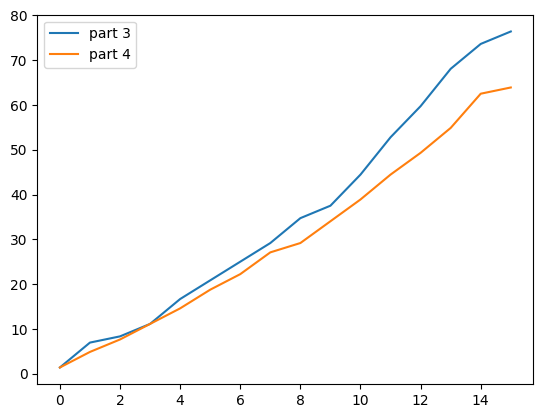

In [70]:
plt.figure()
plt.plot(res[0])
plt.plot(res2[0])
plt.legend(['part 3', 'part 4'])
plt.show()

6.)(PARAVIEW) In Paraview, open the “.raw” binary file you saved in Coding 1 (using the “Image Reader” importer) and visualize it using volume rendering. Modify the transfer function to produce a visualization similar to the figure below (note the axis labels are visible). Save the resulting visualization in a png file and  the Paraview state file for this view (File-> Save State) in a pvsm file. [10 pts]

7.) (PARAVIEW) In Paraview, open the “.raw” binary file you saved in Coding 1 (using the “Image Reader” importer) and visualize it using volume rendering. Modify the transfer function to produce a visualization similar to the figure below (note the axis labels are visible). Save the resulting visualization in a png file and  the Paraview state file for this view (File-> Save State) in a pvsm file. [10 pts]